In [ ]:
import numpy as np
import pandas as pd
import math

In [ ]:
df = pd.read_csv("weatherAUS-noDir.csv")



In [ ]:
df

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindSpeedNorth,WindSpeedEast,WindSpeedNorth9am,WindSpeedEast9am,WindSpeedNorth3pm,WindSpeedEast3pm
0,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,-0.0,-44.0,-0.0,-20.0,9.0,-22.0
1,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,17.0,-41.0,4.0,-2.0,-8.0,-20.0
2,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,-18.0,-42.0,-0.0,-19.0,-10.0,-24.0
3,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,17.0,17.0,-8.0,8.0,0.0,9.0
4,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,-0.0,-41.0,3.0,6.0,14.0,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142136,3.5,21.8,0.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0,0.0,31.0,-6.0,14.0,0.0,13.0
142137,2.8,23.4,0.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0,0.0,31.0,-9.0,9.0,4.0,10.0
142138,3.6,25.3,0.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0,20.0,-8.0,-9.0,9.0,9.0,0.0
142139,5.4,26.9,0.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0,37.0,0.0,-6.0,6.0,3.0,-8.0


In [ ]:
df_train = df.sample(frac = 0.8)
df_test = df.drop(df_train.index, axis = 0)

x_train = df_train.drop(columns = ['RainTomorrow'])
y_train = pd.DataFrame(df_train['RainTomorrow'])

x_test = df_test.drop(columns = ['RainTomorrow'])
print(len(x_test.columns))
y_test = pd.DataFrame(df_test['RainTomorrow'])

x_train = df_train.drop(columns = ['RainTomorrow'])
y_train = pd.DataFrame(df_train['RainTomorrow'])

x_test = df_test.drop(columns = ['RainTomorrow'])

16


In [ ]:
from sklearn.preprocessing  import StandardScaler

standard_scaler = StandardScaler()
standard_scaler = standard_scaler.fit(x_train)

x_train = pd.DataFrame(standard_scaler.transform(x_train))

means = standard_scaler.mean_
vars = standard_scaler.var_
print(len(x_test.columns))
i = 0
for col in x_test.columns:
  x_test[col] = (x_test[col] - means[i])/math.sqrt(vars[i])
  i+=1
print(x_test.describe())


16
            MinTemp       MaxTemp      Rainfall   Humidity9am   Humidity3pm  \
count  28428.000000  28428.000000  28428.000000  28428.000000  28428.000000   
mean      -0.000866     -0.003252      0.005169      0.002387      0.003513   
std        0.998090      1.001590      1.039244      1.001993      1.003863   
min       -3.156619     -3.646158     -0.277791     -3.573730     -2.495503   
25%       -0.701760     -0.749695     -0.277791     -0.625410     -0.703135   
50%       -0.029410     -0.088851     -0.277791      0.059021      0.023501   
75%        0.721121      0.712597     -0.206034      0.743453      0.701695   
max        2.831987      3.496576     33.017549      1.638478      2.348736   

        Pressure9am   Pressure3pm       Temp9am       Temp3pm     RainToday  \
count  28428.000000  28428.000000  28428.000000  28428.000000  28428.000000   
mean      -0.004896     -0.004094     -0.003425     -0.003527     -0.000949   
std        1.005662      1.004922      1.003034 

Gaussian NB
We made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution, if not we did that using standard scalar


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_pred=gnb.predict(x_test)
print(y_pred)

[0 0 1 ... 0 0 0]


In [ ]:
#Check the accuracy
from sklearn import metrics
print('Model precision score: {0:0.4f}'. format(metrics.precision_score(y_test, y_pred)))

Model precision score: 0.5761


In [ ]:
#Now,compare the train-set and test-set accuracy to check for overfitting.
y_pred_train = gnb.predict(x_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_train, y_pred_train)))
print('Model test set accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)))




Training-set accuracy score: 0.8100
Model test set accuracy score: 0.8061


The training set accuracy score is 0.809, while the test set accuracy score is 0.8081 which are close enough,
so no overfitting


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm= np.array(confusion_matrix(y_test, y_pred))

print(cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

[[19604  2437]
 [ 3075  3312]]

True Positives(TP) =  19604

True Negatives(TN) =  3312

False Positives(FP) =  2437

False Negatives(FN) =  3075


Confusion matrix gives a summary of correct and incorrect predictions broken down by each category.
The summary is represented in a tabular form.

<AxesSubplot:>

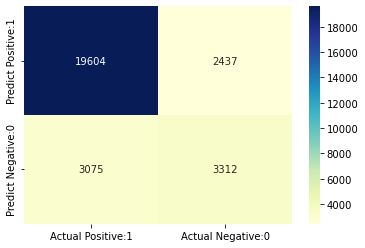

In [ ]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Classification Report
# It displays the precision, recall, f1 and support scores for the model.
#Mathematically, precision can be defined as the ratio of TP to (TP + FP)
#Recall identifies the proportion of correctly predicted actual positives.
#Mathematically, recall can be given as the ratio of TP to (TP + FN)
#f1-score is the weighted harmonic mean of precision and recall.

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     22041
           1       0.58      0.52      0.55      6387

    accuracy                           0.81     28428
   macro avg       0.72      0.70      0.71     28428
weighted avg       0.80      0.81      0.80     28428



In [ ]:
#Applying k=7 Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, y_train.values.ravel(), cv = 10, scoring='precision')

print('Cross-validation accuracy scores for the 10 differnet folds:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))



Cross-validation accuracy scores for the 10 differnet folds:[0.58880564 0.59009206 0.58448276 0.57809773 0.58663697 0.58602388
 0.59472527 0.58318815 0.5694384  0.59620722]
Average cross-validation score: 0.5858


Using the mean cross-validation, we can conclude that we expect the model to be around 80.9% accurate on average.
If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 80.201005 % accuracy to 80.864322% accuracy. So, we can conclude that the model is independent of the particular folds used for training.


Our original model accuracy is 79.95, but the mean cross-validation accuracy is 80.5. So, the 10-fold cross-validation accuracy results in performance improvement for this model.